# Scipy & statsmodels

* `scipy`
    * 고급 수학 함수, 수치적 미적분, 미분 방정식 계산, 최적화, 신호 처리 등에 사용하는 다양한 과학 기술 계산 기능을 제공

* `statsmodels`
    * 검정 및 추정 , 회귀분석, 시계열분석등의 다양한 통계분석 기능을 제공
    * `patsy` 패키지를 포함 ("y ~ x1 + x2" 수식 문법 사용 가능)
        * pasty를 통해 기존에 R에서만 가능했던 회귀분석과 시계열분석 방법론을 파이썬에서도 이용 가능
    * 예제 데이터셋, 검정 및 모수추정, 회귀분석, 선형회귀, 강건회귀, 일반화 선형모형, 혼합효과모형, 이산종속변수, 시계열 분석, SARIMAX 모형, 상태공간 모형, 벡터 AR 모형, 생존분석, 요인분석
        * SARIMAX model (seasonal autoregressive integrated moving average /exogenous model) AR모형과 MA모형을 동시에 포함되게 됩니다. 일반적인 AR이나 MA모형은 Univariate(단변량) 시계열을 표현하는데 적절한 모형이지만 ARIMAX모형은 추가적인 Explanatory variable을 활요함으로써 다변량 시계열 데이터를 활용하기에 적절한 모형입니다.

In [ ]:
import scipy.stats as sp
import statsmodels.api as sm

# 정규성 검정

* 모수적 검정 vs. 비모수적 검정
    * 모수적 검정(parametric test): 정규분포 등 알려진 모수적 분포 하에서 수행하는 검정
    * 비모수적 검정(nonparametric test): 모수적 분포를 가정할 수 없어, 순위(rank) 등을 이용하여 모수분포 가정 없이 수행하는 검정


군별 표본수 | 판단방법
:--- | :---
N < 10 | 비모수적 검정 선택
10 ≤ N < 30 | 정규성 판단 후 선택
N ≥ 30 | 1. 정규성 검정 후 판단 <br><br> 2. 중심극한정리에 의해 모수적 검정 선택 <br><br> 3. 심하게 왜곡된 분포나 이상치가 많은 경우 비모수적 검정 선택

<br>

* 정규성 판단
    1. plot (histogram, boxplot, QQplot)
    2. 통계적 검정
        * H0: 정규성을 따른다
        * H1: 정규성을 따르지 않는다




## plot

In [ ]:
# random number generation
import numpy as np
np.random.seed(10)
x = np.random.normal(loc=0, scale=1, size=1000)

In [ ]:
# Histogram
import seaborn as sns
sns.displot(x);

In [ ]:
# boxplot
sns.boxplot(x);

In [ ]:
# QQ plot
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(x, dist=stats.norm, plot=plt);

## 정규성 검정


* 정규성 검정 종류
    1. Shapiro-Wilk test
        * 대표본에서는 작은 정규성 이탈에도 민감한 편
        * 3 ≤ N < 5000 일 때, 검정 가능
    2. Kolmogorov-Smirnov test
        * 큰 자료에서 사용
        * 자료의 누적빈도를 통해 통계량 계산
        * 이상치의 영향을 받는 편

In [ ]:
# Shapiro-Wilk test
from scipy.stats import shapiro
shapiro(x)
# help(shapiro)  # output이 무엇인지 확인 (return)
stat, p = shapiro(x)

print("stat=%.3f, p=%.3f" % (stat, p))
if p > 0.05:
    print("정규성 가정 만족")
else :
    print("정규성 가정 불만족")

In [ ]:
# Kolmogorov-Smirnov test
# - alternative="two-sided" : F(x) != G(x) for all x 검정
# - alternative="less": F(x) < G(x) for all x 검정
# - alternative="greater": F(x) > G(x) for all x 검정
from scipy.stats import kstest
stat, p = kstest(x, cdf="norm", alternative="two-sided")
print("p=%.3f" % p)
print(["정규성 가정 만족" if p>=0.05 else "정규성 가정 불만족"])

# 연관성 분석

질문 | 분석방법 예시
:--- | :---
연령과 혈압은 어떤 관계가 있을까? | correlation analysis
혈압에 영향을 미치는 인자는 무엇일까? | Linear regression analysis
고혈압 유무에 영향을 미치는 인자는 무엇일까? | Logistic regression analysis
고혈압 발생율에 영향을 미치는 인자는 무엇일까? | Poisson regression analysis
고혈압 환자의 생존율에 영향을 미치는 인자는 무엇일까? | Cox proportional hazard regression analysis

# 상관분석

* 상관관계 종류

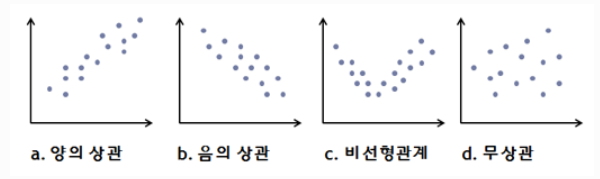

* 상관분석이 부적합한 경우

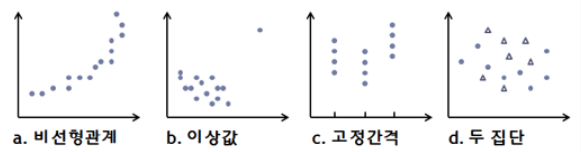

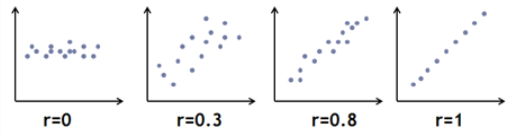

## 상관계수

* 공분산 (covariance)
\begin{equation}
Cov(X,Y) = \frac{\sum{(X-\bar{X})(Y-\bar{Y})}}{n}
\end{equation}

* 상관계수 (correlation coefficient)
\begin{equation}
Corr(X,Y) = \frac{Cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}
\end{equation}

* 해석 (부호)
    * r>0 : 양의 상관관계 (positive correlation)
    * r<0 : 음의 상관관계 (negative correlation)
    * r=0 : 무상관 (no correlation)
* 해석 (크기)
    * |r| ≤ 0.2       : 매우 약한 상관관계 (very week)
    * 0.2 ≤ |r| ≤ 0.4 : 약한 상관관계 (week)
    * 0.4 ≤ |r| ≤ 0.6 : 중간 정도의 상관관계 (moderate)
    * 0.6 ≤ |r| ≤ 0.8 : 강한 상관관계 (strong)
    * 0.8 ≤ |r| ≤ 1   : 매우 강한 상관관계 (very strong)

* 상관계수 계산
    * `np.corrcoef(x, y)` : Pearson's correlation coefficient 계산
    * `pd.Series.corr(y, method="pearson")`
        * `method` : "pearson", "spearman", "kendall" 사용 가능
    * `scipy.stat.pearsonr(x, y)`
    * `scipy.stat.spearmanr(x, y)`
    * `scipy.stat.kendalltau(x, y)`
        * 상관계수 및 검정 진행
        * H0: rho=0 vs. H1: rho != 0

## 산점도

* birth 데이터를 이용하여 신생아의 재태주수(gestwks)와 출생체중(bweight)에 대하여 상관분석을 수행하시오 [데이터명: birth.xlsx]

In [ ]:
## 구글 드라이브 마운트
from google.colab import drive
drive.mount("/content/drive/")

In [ ]:
# birth.xlsx 데이터 읽어오기
dpath = "/content/drive/MyDrive/data/"

import pandas as pd

df = pd.read_excel(dpath + "birth.xlsx")
df['hyp'] = df['hyp'].replace({0:'N', 1:'Y'})
df['sex'] = df['sex'].replace({1:'male', 2:'female'})
df.head()

In [ ]:
# birth 데이터 살펴보기
df.info()

In [ ]:
df.describe()

In [ ]:
# 정규성 검정
from scipy.stats import shapiro
print(shapiro(df.bweight))
print(shapiro(df.gestwks))

import seaborn as sns
sns.set_style("whitegrid");
sns.histplot(df["bweight"]);

In [ ]:
sns.histplot(df["gestwks"]);

In [ ]:
# 결측 제거
x = df[["bweight", "gestwks"]].dropna().bweight
y = df[["bweight", "gestwks"]].dropna().gestwks

In [ ]:
# numpy 이용
np.corrcoef(x, y)

In [ ]:
# pandas 이용
print(x.corr(y, method="pearson"))
print(x.corr(y, method="spearman"))
print(x.corr(y, method="kendall"))

In [ ]:
# scipy.stats 이용
from scipy.stats import pearsonr, spearmanr, kendalltau

print(pearsonr(x, y))
print(spearmanr(x, y))
print(kendalltau(x, y))

In [ ]:
# 산점도
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x="bweight", y="gestwks", data=df)

r, p = pearsonr(x, y)
plt.text(x=3000, y=26, s="r=" + str(r.round(3)) + ", p<0.001", fontdict=dict(color="k", size=12));

* 결과 정리

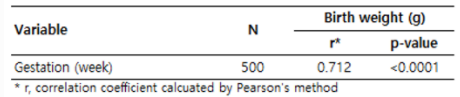

# 단순선형회귀분석

* 회귀분석
    * 유전학자 F. Galton이 아버지와 아들의 신장(height)간에 어떠한 연관성이 있는지를 알아보는 연구에서 이 두 변수간의 관계를 선형모형으로 적합하여 아들의 신장이 평균값으로 회귀(regress)되는 현상을 발견한 것에서부터 유래

    * 특정한 현상과 그 현상에 영향을 미칠 수 있는 변수들 간의 함수관계를 표현할 수 있는 모형을 이론적 근거나 경험적 판단에 의하여 설정하고 관측된 자료로부터 함수관계를 추정하고 예측하는 통계적인 분석방법

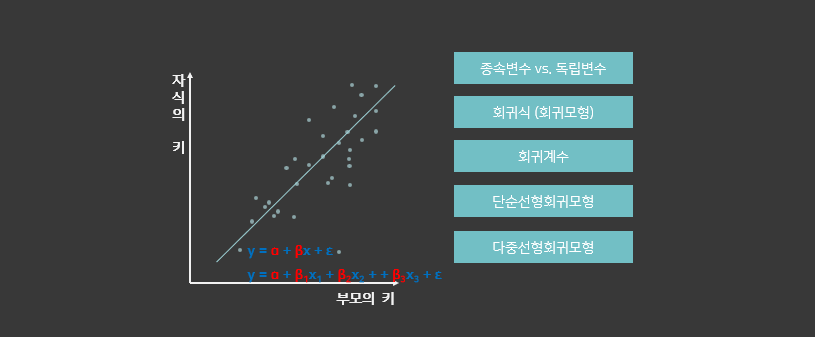

* 단순선형회귀분석

    * 목적 : 연속형 종속변수(y)에 대한 독립변수(x)의 영향력을 선형 회귀식으로 추정
    * 가정
        * 선형성 (y와 x가 선형관계에 있음)
        * 오차항의 정규성 (오차가 정규분포를 따름)
        * 오차항의 독립성 (오차들이 서로 영향을 받지 않고 독립적)
        * 오차항의 등분산성 (모든 독립변수의 값에서 오차의 분산은 동일할 것)
    * 회귀식
    \begin{equation}
    y = α + βx + ε
    \end{equation}

       * $\alpha$ (intercept, 절편) : x=0일 때 y값들의 평균
        * $\beta$ (slope, 기울기) : x가 1단위 증가할 때 y의 평균적인 증가량 / 회귀계수 (regression coefficient)
      * 회귀모형 (regression model)이라고 부르기도 함
     * 주로 최소제곱법(Least square method)에 의해 추정됨 (오차항의 제곱합이 최소가 되는 직선)
    * 오차항(error term, ε)과 잔차 (residual)
        * 오차항 : 회귀식에서 x에 의해 설명되지 않는 남은 변동
        * 잔차 : 실제 관측값과 회귀선에 의한 예측값 사이의 차이 / 오차항의 추정치
        * 가정 확인 시, 오차항의 추정치인 잔차를 이용
        

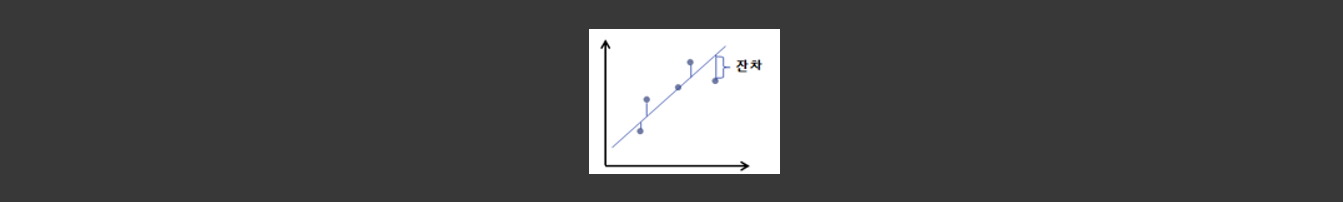

## 단순선형회귀분석의 절차


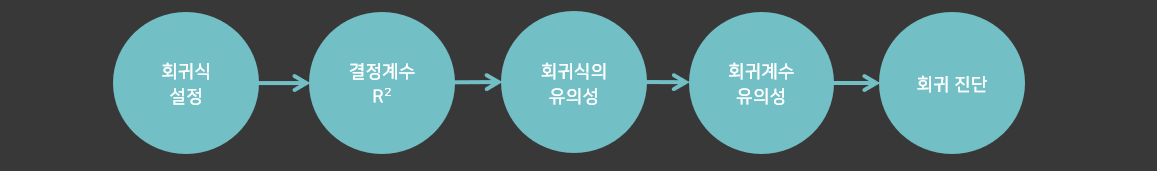

1. 결정계수 $R^{2}$

* 추정된 회귀식의 설명력
* 회귀식 전체가 설명하는 종속변수 y의 변동 비율
* 단순 선형회귀분석에서의 결정계수는 Pearson’s correlation (r) 의 제곱과 동일
* $ 0 ≤ R^{2} ≤ 1$ (1에 가까울수록 설명력이 높은 것)
* 보통 0.7이상이면 회귀모형의 적합도가 높다고 판단

<br>

2. 회귀식의 유의성

* 회귀식의 설명비율이 오차에 의한 비율보다 높은가를 검정
* 즉, 회귀식이 통계적으로 의미있는가를 확인 (회귀식에 의한 추정이 단순 평균 추정보다 더 정확하다는 의미)
* 회귀분석 후 분산분석 표(F-test)를 통해 확인
    * 귀무가설 : 회귀식(y = α + βx)으로 y의 변동량을 설명할 수 없다
    * 대립가설 : 회귀식(y = α + βx)으로 y의 변동량을 설명할 수 있다
    * p<0.05이면 추정된 회귀식이 통계적으로 유의하다고 판단

<br>

3. 회귀계수($\beta$)의 유의성

* 종속변수 y 와 독립변수 x가 관련이 있는지 나타냄 (회귀계수를 제시할 때 95% 신뢰구간도 함께 제시)
* 단순 회귀분석에서는 회귀식의 유의성 검정과 회귀계수의 유의성 검정이 실제로 같은 결과 보여줌
* 다중 회귀분석에서는 회귀식의 유의성 검정 후, 각 독립변수 별로 회귀계수의 유의성을 개별 검정
    * 귀무가설 : $\beta = 0$ (x는 y와 관계가 없다)
    * 대립가설 : $\beta \neq 0$ (x는 y와 관계가 있다)
    * p<0.05이면 추정된 회귀계수가 통계적으로 유의하다고 판단


<br>



4. 회귀진단

* 추정된 회귀식이 기본 가정을 만족하는지 확인하는 절차
* 오차항에 대한 가정은 오차항의 추정치인 잔차를 통해 검정

    1. 선형성 : 산점도로 확인
    2. 오차항의 정규성 : 잔차의 정규 P-P도표로 확인 (점들이 직선에 가까우면 정규성을 따른다고 판단)
    3. 오차항의 독립성 : 잔차 산점도 및 Durbin-Watson 통계량으로 확인 (DW가 2 안팎이면 이웃하는 잔차간에 상관성이 없다고 판단 / 0이나 4에 가까우면 독립성 위배)
    4. 오차항의 등분산성 : 잔차 산점도로 확인 (규칙 없이 퍼져 있으면 독립성과 등분산성 만족한다고 판단)

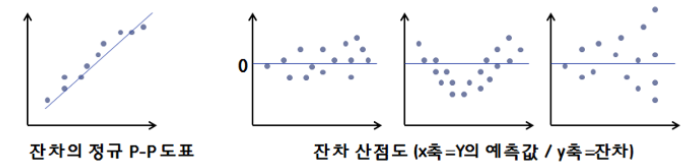

* 회귀진단에 이용되는 통계량

Term | Details
:--- | :---
fitted value | (추정된 회귀식에 기초하여) 해당 요인에 대해 예측된 종속변수 값
residual | (추정된 회귀식에 기초한) 적합값과 실제 관측값의 차이
Studentized residual | 잔차를 표준편차로 나눈 표준화한 값/절대값이 2보다 큰 경우 이상값 의심
excluded studentized residual | 해당 값 제외 후 계산한 표준화 잔차 / 절대값이 2보다 큰 경우 이상값 의심
outlier | (다른 관측값들이 모형을 잘 따르는 반면) 모형을 잘 따르지 않는 관측값
 | 독립변수에서의 이상치 : 다른 독립변수들의 모임에서 벗어난 독립변수 값. 레버리지값으로 판단
 | 종속변수에서의 이상치 : 추정된 회귀식으로부터 떨어진 종속변수값. 표준화잔차값으로 판단
leverage point | (독립변수의) 평균으로부터 멀리 떨어진 관측값. 회귀계수의 추정에 큰 영향을 줄 수 있음 (Hat행렬의 대각원소)
influential point | 회귀식에 크게 영향을 미치는 관측값. 이 값이 제거되면 회귀계수 추정값이 크게 변함. 영향점은 <u>지렛점과 이상치의 산물</u>로 생각될 수 있음
Cook’s distance | 해당 관측값이 제외될 때 회귀식이 얼마나 크게 변하는지 측정 (모형에 대한 전반적인 영향도)
 | 관측값의 leverage와 residual의 정보를 동시에 고려한 척도
 | 1보다 크면 영향점 의심

## 모형 적합 1 (상수항 생성)

* `statsmodels.api`

* `sm.add_constant(x, has_constant="skip")`
    * `has_constant="skip"`  : 데이터에 상수항이 있을 경우 미추가 (default)
    * `has_constatn="raise"` : 데이터에 상수항이 있을 경우 에러 출력
    * `has_constatn="add"` : 데이터에 상수항이 있을 경우 상수항을 중복 생성

* `sm.OLS(endog, exog=None)` : 회귀식 설정
    * `endog` : endogenous variable (종속변수)
    * `exog` : exogenous variable (독립변수)

* `sm.OLS.fit()` : 회귀식 적합
    * `.summary()` : 결과 출력
    * `.rsquare`   : 결정계수 출력
    * `.f_pvalue`  : 회귀식의 유의확률
    * `.params`    : 회귀계수 출력
    * `.pvalues`   : 회귀계수의 유의확률
    * `.resid`     : 회귀잔차
    * `.predict()` : 예측값 $\hat{y}$ 계산
    



* 허리둘레와 복부지방양의 연구 데이터를 이용하여 CT로부터 얻은 복부지방양을 허리둘레를 이용하여 예측할 수 있는 회귀모형에 대한 분석을 수행하시오. [데이터명 : fat.xlsx]

In [ ]:
df = pd.read_excel(dpath + "fat.xlsx")

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
# 상관관계 체크
import seaborn as sns
sns.relplot(x="waist", y="fat", data=df);

In [ ]:
# 정규성 검정
from scipy.stats import shapiro
print(shapiro(df.waist))
print(shapiro(df.fat))

In [ ]:
# 상관계수
from scipy.stats import spearmanr
spearmanr(df.waist, df.fat)

In [ ]:
# 단순선형회귀분석
import statsmodels.api as sm

# 1. 상수항 추가
waist1 = sm.add_constant(df.waist, has_constant="add")
print(type(waist1))
print(waist1.head())

# 2. 회귀식 설정
model = sm.OLS(df.fat, waist1)

# 3. 모형 적합
fitted = model.fit()

# 4. 결과 확인
fitted.summary()
fitted.summary().tables[0]
fitted.summary().tables[1]
fitted.summary().tables[2]

# 1) 결정계수
dir(fitted)
fitted.rsquared.round(2)

# 2) 회귀식의 유의성
fitted.f_pvalue.round(3)

# 3) 회귀계수의 유의성
print(fitted.summary().tables[1])
fitted.params
fitted.pvalues

# 4) 회귀진단
fitted.resid

import seaborn as sns
sns.residplot(x=df.waist, y=df.fat);

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence
dir(OLSInfluence(fitted))
res = OLSInfluence(fitted)
print(res.resid_std)  # Standardized residual
print(res.resid_studentized)  # Studentized residual
res.summary_frame()
res.summary_table()
    # fitted value (적합값)
    # Cook's distance (영향점과 지렛점을 동시고려 / 1보다 크면 영향점 의심)
    # studentized residual (스튜던트화 잔차)
    # hat diag (햇행렬의 대각원소 = 레버리지)
    # diffits internal

In [ ]:
## 예측
## yhat 직접 구하기 회귀계수 X 데이터
print(np.dot(waist1, fitted.params))

## predict() 이용
print(fitted.predict(waist1))

sum(fitted.predict(waist1) - np.dot(waist1, fitted.params))

In [ ]:
# 실측값 vs 예측값 시각화
import seaborn as sns
sns.lineplot(df.waist, color="g", linestyle=":");
sns.lineplot(fitted.predict(waist1), color="r", linestyle=":");

In [ ]:
# 회귀직선 시각화
sns.lmplot(x="waist", y="fat", data=df);

In [ ]:
sns.regplot(x="waist", y="fat", data=df);

## 모형 적합 2 (회귀식)


In [ ]:
import statsmodels.api as sm

# 회귀식 설정
model = sm.OLS.from_formula("fat ~ waist", data=df)
fit = model.fit()
fit.summary()

## 모형 적합 3 (회귀식)

In [ ]:
## 회귀식 적합 2
from statsmodels.formula.api import ols
model = ols("fat ~ waist", data=df)
fit = model.fit()
print(fit.summary())

* 결과 정리


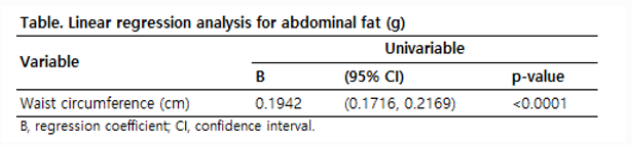

## 범주형변수 처리



* 산모의 임신기간, 산모의 흡연상태가 태아의 출생 시 몸무게에 어떠한 영향을 미치는지 조사할 때, 산모의 흡연여부에 대한 해석

\begin{equation}
E(Y) = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} \\
E(Y) = \beta_{0} + \beta_{1}x_{1} (비흡연자) \\
E(Y) = \beta_{0} + \beta_{1}x_{1} + \beta_{2} (흡연자)
\end{equation}



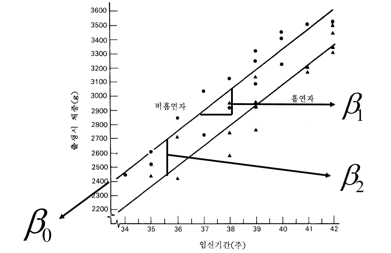

In [ ]:
# 더미변수 생성
example = pd.DataFrame({"code": [0, 1, 2, 3], "level":["정상", "경미", "중상", "심각"]})
example

In [ ]:
pd.get_dummies(example)

In [ ]:
pd.get_dummies(example, columns=["code"])

In [ ]:
pd.get_dummies(example, columns=["code"], drop_first=True)

* 신생아체중 데이터(birth.xlsx)에서 산모의 고혈압 여부(hyp)에 따른 신생아의 출생체중(bweight)에 대해 회귀분석을 진행하시오.


In [ ]:
import pandas as pd
df = pd.read_excel(dpath + "birth.xlsx")
df['hyp'] = df['hyp'].replace({0:'n', 1:'y'})
df['sex'] = df['sex'].replace({1:'male', 2:'female'})
df.head()

In [ ]:
# 산모의 고혈압 여부를 더미변수로 변경
df2 = pd.get_dummies(df, columns=["hyp"], drop_first=True)
df2.head()

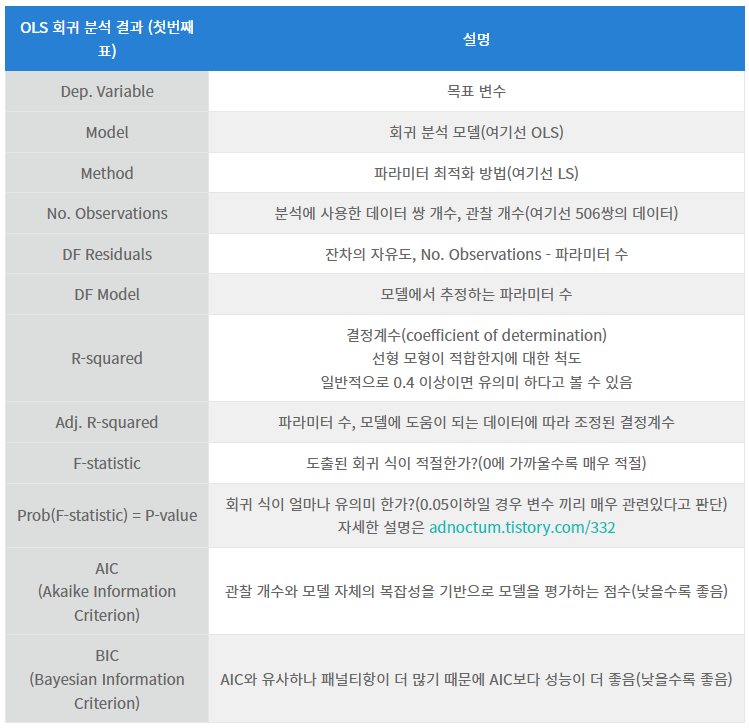

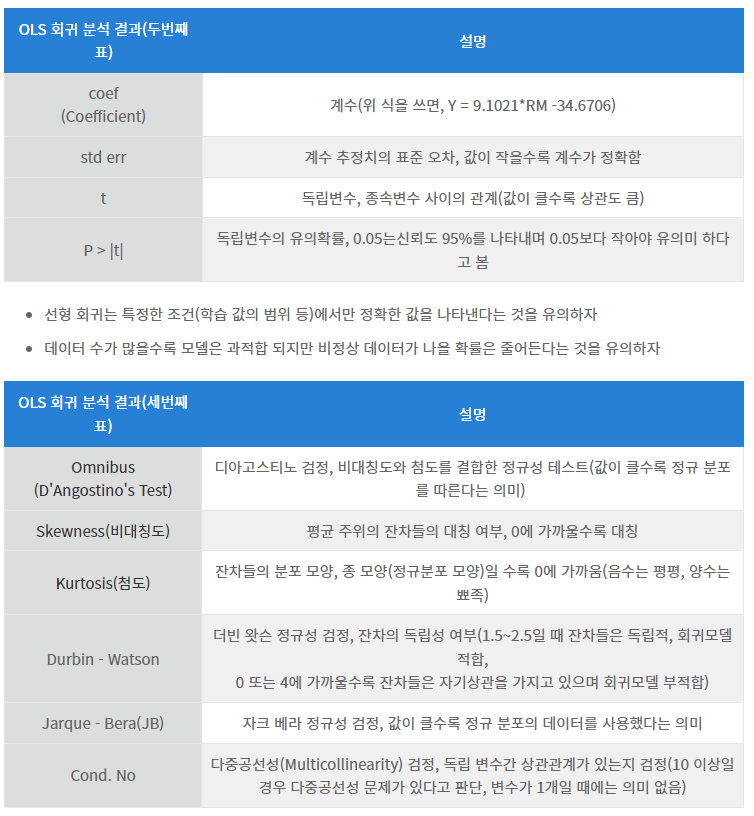

In [ ]:
# 회귀식 적합

# 1. OLS 이용
import statsmodels.api as sm
hyp1 = sm.add_constant(df2.hyp_y, has_constant="add")
model = sm.OLS(df2.bweight, hyp1)
fitted = model.fit()
print(fitted.summary())

In [ ]:
# 2. OLS.from_formula() 이용
import statsmodels.api as sm
model = sm.OLS.from_formula("bweight ~ hyp_y", data=df2)
fitted = model.fit()
print(fitted.summary())

In [ ]:
# 3. ols() 이용
from statsmodels.formula.api import ols
model = ols("bweight ~ hyp_y", data=df2)
fitted = model.fit()
print(fitted.summary())

* 결과 정리

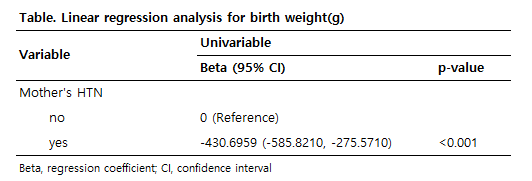

# 다중선형회귀분석

## 다중선형회귀분석의 절차

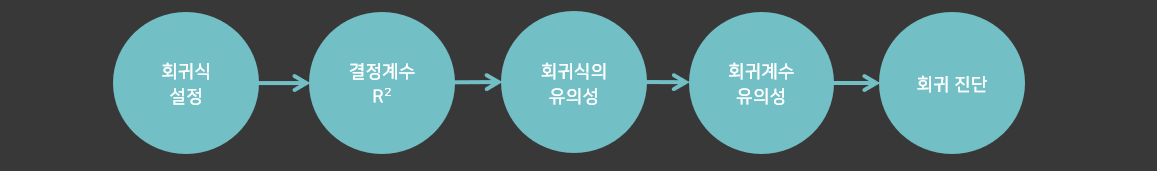



* 수정된 결정계수 (adjusted $R^{2}$)
    * 회귀식 전체가 설명하는 종속변수 y의 변동 비율 계산 시, 독립변수의 수를 고려
    * 새로 추가된 독립변수의 설명력이 미미한 경우, R2 은 조금 증가할 수 있으나, adj.$R^{2}$은 오히려 감소
    * 0~1 사이 값을 가짐. 1에 가까울수록 설명력이 높은 것.
    * 보통 0.7이상이면 회귀모형의 적합도가 높다고 판단

<br>

* 회귀식의 유의성
    * Simple linear regression과 동일하게 회귀분석 후 분산분석 표를 통해 확인
    * p<0.05이면 추정된 회귀식이 통계적으로 유의하다고 판단




* 나이와 치료 방법에 따른 수술의 효과를 검정하고자 한다. 36명의 데이터를 활용하여 다중회귀분석을 수행하라. [데이터명 : op.xlsx]

In [ ]:
## 데이터 불러오기
import pandas as pd
df = pd.read_excel(dpath + "op.xlsx")
df.head()

In [ ]:
## 단순선형회귀분석 - age 모형 적합 1
import statsmodels.api as sm
age1 = sm.add_constant(df["age"], has_constant="add")
model1 = sm.OLS(df.Y, age1)
fitted1 = model1.fit()
print(fitted1.summary())

In [ ]:
## 단순선형회귀분석 - treatment 모형 적합 2
## 빈도 확인
df.treatment.value_counts()

In [ ]:
# 더미변수화
df2 = pd.get_dummies(df, columns=["treatment"], drop_first=True)
df2.head()

In [ ]:
import statsmodels.api as sm
model2 = sm.OLS.from_formula("Y ~ treatment_B + treatment_C", data=df2)
fitted2 = model2.fit()
print(fitted2.summary())

In [ ]:
## 다중선형회귀분석 - age, treatment 동시에 모형 적합 3
from statsmodels.formula.api import ols
model3 = ols("Y ~ age + treatment_B + treatment_C", data=df2)
fitted3 = model3.fit()
print(fitted3.summary())

In [ ]:
# 3개 모델 비교
print("설명력: %.3f, %.3f, %.3f" % (fitted1.rsquared, fitted2.rsquared, fitted3.rsquared))

## 다중공선성

* multicollinearity
* 독립변수들이 너무 밀접한 관련이 있어서 각각의 영향을 보정하여 분석하기 어려운 상태
* 다중 공선성이 있을 경우 추정치의 분산이 증가하여 회귀계수들의 신뢰도 감소
* 분산팽창요인 (Variance inflation factor, $VIF=1/(1−R^{2})$)
* 이 변수에 의해 회귀계수의 분산이 팽창된 정도
* 10 이상이면 다중공선성 있다고 판단
* 의미가 더 중요하거나, 종속변수와의 관련성이 더 높은 변수를 선택 (두 변수의 결합변수를 만들기도 함)



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dir(model3)
print(model3.exog_names)
print(model3.endog_names)

In [ ]:
for i in range(1,4):
    print(model3.exog_names[i] + ": " + str(variance_inflation_factor(model3.exog, i).round(3)))

## 범주형 변수와 연속형 변수의 교호작용

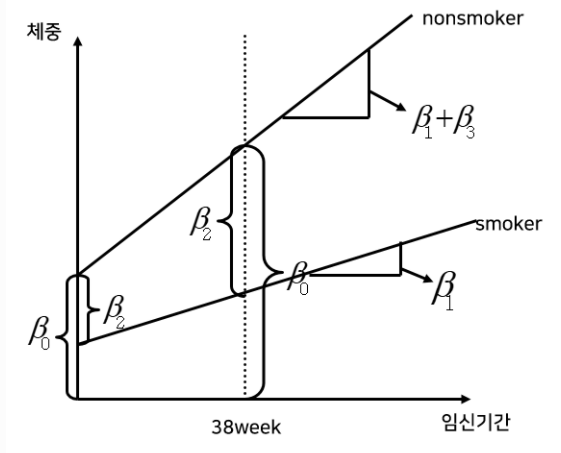



* 모형:
$$ E(Y)=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2} + \beta_{3}x_{1}x_{2}$$
* 흡연자의 모형($x_{2}=0$):
$$ E(Y)=\beta_{0}+\beta_{1}x_{1} $$
* 비흡연자의 모형($x_{2}=1$):
$$ E(Y)=β0+β1x1+β2+β3x1=(β0+β2)+(β1+β3)x1 $$

In [ ]:
# 연령과 수술 방법 간의 교호작용 확인 (모형 적합 3)
from statsmodels.formula.api import ols
model4 = ols("Y ~ age + treatment_B + treatment_C + age*treatment_B + age*treatment_C", data=df2)
fitted4 = model4.fit()
print(fitted4.summary())

In [ ]:
print(fitted3.summary())

In [ ]:
# 교호작용을 제외한 모형과 비교
fitted4.compare_lr_test(restricted=fitted3)

* 결과 정리

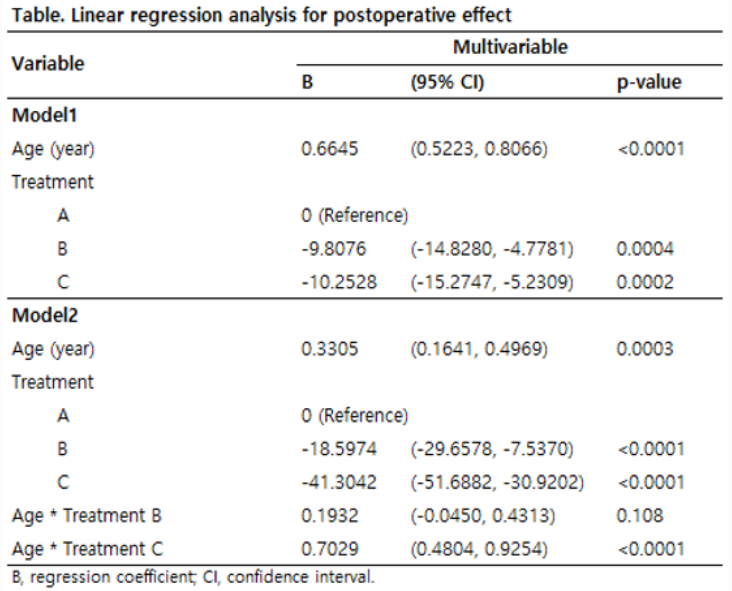



## 변수선택법

* Forward selection: 회귀계수의 유의확률이 가장 낮은 변수부터 모형에 넣고 남은 변수 중 모형에 추가하였을 때 유의확률이 가장 낮은 변수를 순서대로 더해 나감
* Backward selectinon: 모든 변수를 회귀식에 넣은 상태에서 유의확률이 가장 높은 변수부터 제거
* Stepwise selection: 독립변수의 유의확률을 계속적으로 평가하면서 입력, 제거를 반복





* birth data에서 아이의 성별(sex), 재태주수(gestwks), 산모의 나이(matage), 산모의 고혈압여부(hyp)가 출생체중(bweight)과 어떤 관련을 보이는지 최적의 선형회귀모형을 적합하시오.

In [ ]:
# 데이터 호출
df = pd.read_excel(dpath + "birth.xlsx")
df['hyp'] = df['hyp'].replace({0:'n', 1:'y'})
df.head()

In [ ]:
# 종속변수
y = df.bweight

# 독립변수
df2 = pd.get_dummies(df, columns=["hyp"], drop_first=True)
df2.head()

In [ ]:
df3 = pd.get_dummies(df2, columns=["sex"], drop_first=True)
df3.head()

In [ ]:
df4 = df3.copy()
df4.head()

In [ ]:
## 1. 모형 적합
## 2. 통계량 계산 (가장 낮은 AIC 기준)
## 3. 비교 후 선택

"bweight ~ gestwks + matage"

# 회귀식 설정
y = "bweight"
x = ["gestwks", "matage"]
" + ".join(x)
y + "~" + "+".join(x)

# 적합된 모형과 AIC를 반환하는 함수 작성
from statsmodels.formula.api import ols
model = ols(y + "~" + "+".join(x), data=df4)
fitted = model.fit()
print(fitted.summary())

In [ ]:
fitted.aic

In [ ]:
# 모형을 적합시켜서 가장 낮은 AIC를 보이는 모형을 선택
import itertools

def variable_selection(y, x, df):
    model = ols(y + "~" + x[0], data=df)
    fitted = model.fit()
    best_model = fitted

    for k in x:
        model = ols(y + "~" + k, data=df)
        fitted = model.fit()
        if best_model.aic > fitted.aic:
            best_model = fitted

    return best_model

In [ ]:
final = variable_selection(y="bweight", x=["gestwks", "matage", "hyp_y"], df=df4)
print(final.summary())

In [ ]:
print("AIC for gestwks:", ols("bweight ~ gestwks", df4).fit().aic)
print("AIC for matage:", ols("bweight ~ matage", df4).fit().aic)
print("AIC for hyp_1:", ols("bweight ~ hyp_y", df4).fit().aic)

In [ ]:
y = "bweight"
x = ["gestwks", "matage", "hyp_y"]

varlist = x.copy()
varlist.append(y)
print(varlist)
df4[varlist].head()

In [ ]:
df4.dropna(inplace=True)
df4.info()

In [ ]:
print("AIC for gestwks:", ols("bweight ~ gestwks", df4).fit().aic)
print("AIC for matage:", ols("bweight ~ matage", df4).fit().aic)
print("AIC for hyp_y:", ols("bweight ~ hyp_y", df4).fit().aic)

In [ ]:
x = ["gestwks", "matage", "hyp_y", "sex_2"]

# 변수 조합 만들기
import itertools
list(itertools.combinations(x,1))
list(itertools.combinations(x,2))
list(itertools.combinations(x,3))

In [ ]:
# 모든 조합 중 가장 낮은 AIC를 보이는 조합 선택
import itertools
from statsmodels.formula.api import ols

def variable_selection(y, x, df):

    varlist = x.copy()
    varlist.append(y)
    df = df[varlist].dropna()

    model = ols(y + "~" + x[0], data=df)
    fitted = model.fit()
    best_model = fitted

    for k in x:
        model = ols(y + "~" + k, data=df)
        fitted = model.fit()
        if best_model.aic > fitted.aic:
            best_model = fitted

    for n in range(2, len(x)+1):
        for comb in list(itertools.combinations(x,n)):
            model = ols(y + "~" + "+".join(comb), data=df)
            fitted = model.fit()
            if best_model.aic > fitted.aic:
                best_model = fitted

    return best_model

In [ ]:
final = variable_selection(y="bweight", x=["gestwks", "sex_2", "matage", "hyp_y"], df=df3)
print(final.summary())

In [ ]:
# 다중공선성 체크
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(final.model.exog_names)
var = final.model.exog_names
for i in range(1,len(var)):
    print(var[i], ": ", variance_inflation_factor(final.model.exog, i))

# 과제

* `boston.csv`에는 보스턴의 집 가격과 관련된 데이터가 들어있다. Target을 종속변수로 하는 최적의 선형모형을 구축하시오.
* 변수선택법 알고리즘을 적용하여 모형을 구축해보시오.

| 속성 | 설명 |
|------|------|
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| B | $1000(Black-0.63)^{2}$, Black: 자치시별 흑인 비율 |
| RM | 주택 1가구당 평균 방의 수 |
| CRIM | 자치시(town)별 1인당 범죄율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| NOX | 10,000,000당  일산화질소 농도 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| RAD | 방사형 고속도로 접근성 지수 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| TAX | 10,000 달러당 재산 세율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Target | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |




In [ ]:
df = pd.read_csv(dpath + "boston.csv")
df.head()